## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning

In [2]:
sat = pd.read_csv("D:\dsir-111\projects\project-01\data/sat_2019_ca.csv")
expenses = pd.read_csv("D:\dsir-111\projects\project-01\data/expenses_2019_ca.csv")
ap = pd.read_csv("D:\dsir-111\projects\project-01\data/ap_2019_ca.csv")

Dropping data not used on project:

In [3]:
sat.drop(labels = ['CDS', 'CCode', 'CDCode', 'SCode', 'RType', 'Year', 'Unnamed: 25', 'NumERWBenchmark12', 'NumERWBenchmark11', 'NumMathBenchmark12', 'NumERWBenchmark11', 'NumMathBenchmark11', 'TotNumBothBenchmark12', 'TotNumBothBenchmark11', 'Enroll11', 'NumTSTTakr11', 'PctERWBenchmark11', 'PctMathBenchmark11', 'PctBothBenchmark11'], axis=1, inplace=True)
ap.drop(labels = ['CDS', 'CCode', 'DCode', 'SCode', 'RType', 'StudentGroup', 'NumScr1', 'NumScr2', 'Year'], axis=1, inplace=True)
expenses.drop(labels = ['CO Code', 'District Code', 'EDP 365', 'Current\nExpense ADA'], axis=1, inplace=True)

Dropping nulls:

In [4]:
sat = sat[sat['PctBothBenchmark12'].notna()]
ap = ap[ap['NumScr3'].notna()]

Dropping privatized data marked by "*":

In [5]:
sat = sat.drop(sat[sat.PctERWBenchmark12.str.contains(r'[*]')].index)
ap = ap.drop(ap[ap.NumScr3.str.contains(r'[*]')].index)

#credit: https://www.geeksforgeeks.org/pandas-remove-rows-with-special-characters/

Renaming columns:

In [6]:
expenses.rename(columns = {"District" : "dname", "Current\nExpense Per ADA" : "dailyexpense", "LEA Type" : "leatype"}, inplace = True)

Removing data on elementary schools:

In [7]:
expenses = expenses[expenses.leatype != "Elementary"]

Removing data with commas:

In [8]:
expenses['dailyexpense'] = expenses['dailyexpense'].str.replace(',','')

Changing columns' data types:

In [9]:
sat['PctERWBenchmark12'] = sat['PctERWBenchmark12'].astype(float)
sat['PctMathBenchmark12'] = sat['PctMathBenchmark12'].astype(float)
sat['PctBothBenchmark12'] = sat['PctBothBenchmark12'].astype(float)

expenses['dailyexpense'] = expenses['dailyexpense'].astype(float)

ap['NumScr3'] = ap['NumScr3'].astype(int)
ap['NumScr4'] = ap['NumScr4'].astype(int)
ap['NumScr5'] = ap['NumScr5'].astype(int)

Further column renaming:

In [10]:
sat.columns = sat.columns.str.lower()
sat.columns = sat.columns.str.replace('12','')
expenses.columns = expenses.columns.str.lower()
ap.columns = ap.columns.str.lower()

Checking column formatting (AP will be further cleaned later):

In [11]:
print(sat.head())
print(expenses.head())
print(ap.head())

                          sname                      dname        cname  \
2           Belmont Senior High        Los Angeles Unified  Los Angeles   
3       Canoga Park Senior High        Los Angeles Unified  Los Angeles   
5        Foshay Learning Center        Los Angeles Unified  Los Angeles   
6            Mission Viejo High  Saddleback Valley Unified       Orange   
7  Abraham Lincoln Continuation          Riverside Unified    Riverside   

   enroll  numtsttakr  pcterwbenchmark  pctmathbenchmark  pctbothbenchmark  
2   206.0       102.0            30.39             13.73             13.73  
3   227.0       113.0            47.79             15.93             15.93  
5   166.0       106.0            64.15             33.96             33.96  
6   562.0       190.0            84.74             72.63             69.47  
7   114.0        17.0            17.65             11.76             11.76  
                   dname  dailyexpense  leatype
0        Alameda Unified      13070.34 

Checking column dtypes:

In [12]:
print(sat.dtypes)
print(ap.dtypes)
print(expenses.dtypes)

sname                object
dname                object
cname                object
enroll              float64
numtsttakr          float64
pcterwbenchmark     float64
pctmathbenchmark    float64
pctbothbenchmark    float64
dtype: object
sname         object
dname         object
cname         object
enroll1012     int64
enroll12       int64
numtsttakr     int64
numscr3        int32
numscr4        int32
numscr5        int32
dtype: object
dname            object
dailyexpense    float64
leatype          object
dtype: object


Checking for nulls:

In [13]:
print(sat.isnull().sum())
print(ap.isnull().sum())
print(expenses.isnull().sum())

sname               460
dname                55
cname                 0
enroll                0
numtsttakr            0
pcterwbenchmark       0
pctmathbenchmark      0
pctbothbenchmark      0
dtype: int64
sname         2875
dname          467
cname            0
enroll1012       0
enroll12         0
numtsttakr       0
numscr3          0
numscr4          0
numscr5          0
dtype: int64
dname           0
dailyexpense    0
leatype         0
dtype: int64


Here I realized there are schools grouped into county, district, and state rows, counting some places doubly. Remving these entries:

In [14]:
sat.dropna(inplace = True)
expenses.dropna(inplace = True)
ap.dropna(inplace = True)

sat = sat[sat.sname != "State of California"]
ap = ap[ap.sname != "State of California"]
#credit: https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

Saving cleaned data:

In [15]:
sat.to_csv("D:\dsir-111/projects/project-01/finalprojectCS/datasat_final.csv")
expenses.to_csv("D:\dsir-111/projects/project-01/finalprojectCS/dataexpenses_final.csv")
ap.to_csv("D:\dsir-111/projects/project-01/finalprojectCS/dataap_final.csv")

Checking new data:

In [16]:
sat = pd.read_csv("../data/sat_final.csv")
expenses = pd.read_csv("../data/expenses_final.csv")
ap = pd.read_csv("../data/ap_final.csv")
dexpenses = pd.read_csv("../data/dexpense.csv")

print(sat.head())
print(expenses.head())
print(ap.head())

   Unnamed: 0                         sname                      dname  \
0           2           Belmont Senior High        Los Angeles Unified   
1           3       Canoga Park Senior High        Los Angeles Unified   
2           5        Foshay Learning Center        Los Angeles Unified   
3           6            Mission Viejo High  Saddleback Valley Unified   
4           7  Abraham Lincoln Continuation          Riverside Unified   

         cname  enroll  numtsttakr  pcterwbenchmark  pctmathbenchmark  \
0  Los Angeles   206.0       102.0            30.39             13.73   
1  Los Angeles   227.0       113.0            47.79             15.93   
2  Los Angeles   166.0       106.0            64.15             33.96   
3       Orange   562.0       190.0            84.74             72.63   
4    Riverside   114.0        17.0            17.65             11.76   

   pctbothbenchmark  
0             13.73  
1             15.93  
2             33.96  
3             69.47  
4     

Dropping "Unnamed: 0" columns:

In [17]:
sat.drop(labels = ['Unnamed: 0'], axis=1, inplace=True)
ap.drop(labels = ['Unnamed: 0'], axis=1, inplace=True)
expenses.drop(labels = ['Unnamed: 0'], axis=1, inplace=True)
dexpenses.drop(labels = ['Unnamed: 0'], axis=1, inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

## Data for the average student

Looking at mean of sat enroll divided by numtsttakr, mean of sat pctbothbenchmark, mean of ap enroll12 divided by numtsttakr, and mean of expense dailyexpense:

In [18]:
print(sat.describe())
print(expenses.describe())
print(ap.describe())

            enroll   numtsttakr  pcterwbenchmark  pctmathbenchmark  \
count  1261.000000  1261.000000      1261.000000       1261.000000   
mean    329.314830   133.395718        66.655345         44.378676   
std     211.895718   106.162976        21.480758         23.747142   
min      25.000000    15.000000         1.280000          0.000000   
25%     128.000000    54.000000        51.280000         25.000000   
50%     321.000000   108.000000        69.810000         42.490000   
75%     490.000000   183.000000        84.850000         63.270000   
max    1135.000000   932.000000       100.000000        100.000000   

       pctbothbenchmark  
count       1261.000000  
mean          41.948208  
std           23.732121  
min            0.000000  
25%           22.160000  
50%           39.660000  
75%           60.970000  
max          100.000000  
       dailyexpense
count    420.000000
mean   14368.703833
std     5697.402391
min     9560.140000
25%    12027.622500
50%    13072.28

## Data for County SAT Benchmarks

The counties and their benchmarks:

In [19]:
round(sat.groupby('cname')['pctbothbenchmark'].mean(), 0)

cname
Alameda            46.0
Amador             62.0
Butte              57.0
Calaveras          67.0
Colusa              7.0
Contra Costa       49.0
Del Norte          42.0
El Dorado          68.0
Fresno             33.0
Glenn              26.0
Humboldt           63.0
Imperial           33.0
Inyo               25.0
Kern               36.0
Kings              36.0
Lake               43.0
Lassen             40.0
Los Angeles        32.0
Madera             31.0
Marin              64.0
Mariposa           72.0
Mendocino          49.0
Merced             27.0
Mono               58.0
Monterey           35.0
Napa               45.0
Nevada             78.0
Orange             55.0
Placer             66.0
Riverside          34.0
Sacramento         40.0
San Benito         47.0
San Bernardino     35.0
San Diego          50.0
San Francisco      38.0
San Joaquin        42.0
San Luis Obispo    63.0
San Mateo          57.0
Santa Barbara      62.0
Santa Clara        59.0
Santa Cruz         54.0
Shasta    

The relative color for the percentage:

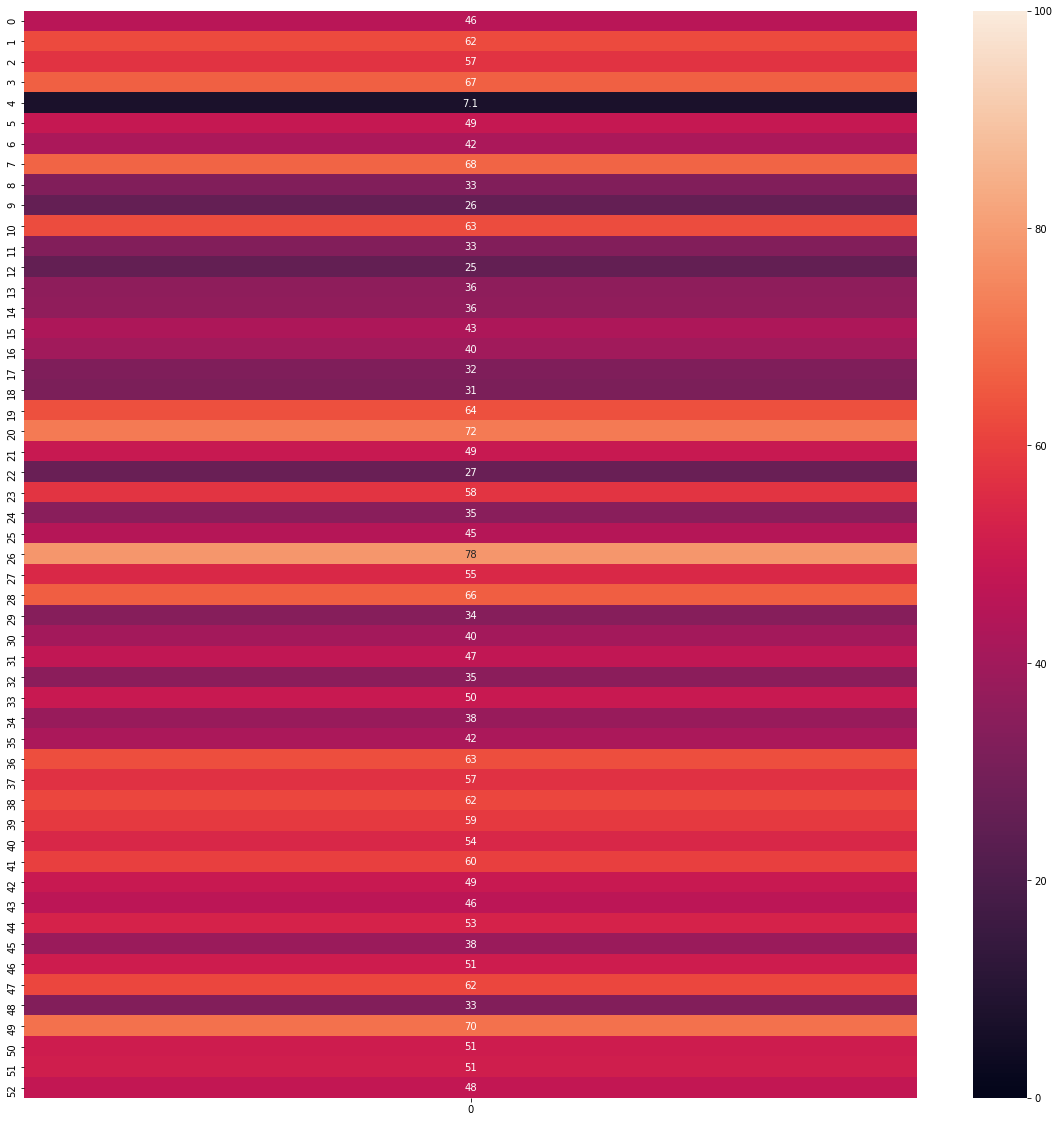

In [20]:
satcounties = sat.groupby('cname')['pctbothbenchmark'].mean()

plt.figure(figsize = (20, 20))
satcounties = np.asarray(satcounties).reshape(53,1)
sns.heatmap(satcounties, vmin = 0, vmax = 100, annot = True, )
plt.show()

#credit: https://stackoverflow.com/questions/57888688/inconsistent-shape-between-the-condition-and-the-input-while-using-seaborn

## Data for Expenses

Adding SAT benchmarks to expenses:

In [21]:
expenses['pctbothbenchmark'] = expenses.dname.map(dexpenses.set_index('dname')['pctbothbenchmark'].to_dict())
#source: https://stackoverflow.com/questions/40603264/pandas-add-a-new-column-in-a-data-frame-based-on-a-value-in-another-data-frame

Creating graph:

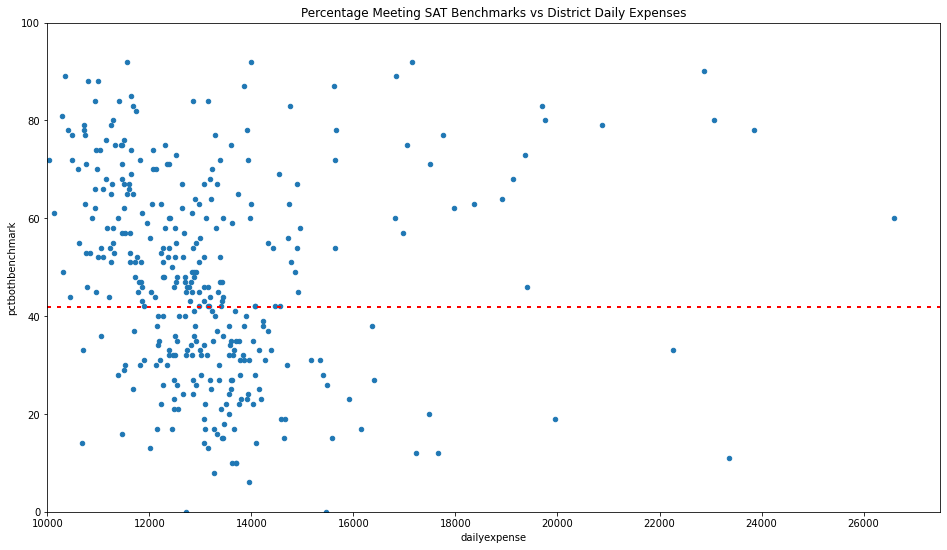

In [22]:
ax = expenses.plot(
    kind='scatter', # specify scatter plot
    x='dailyexpense',
    y='pctbothbenchmark',
    title="Percentage Meeting SAT Benchmarks vs District Daily Expenses",
    figsize=(16, 9),
    xlim= (10000, 27500),
    ylim = (0, 100),
)
ax.axhline(y=sat['pctbothbenchmark'].mean(), color='r', linestyle= (0, (2,3)), linewidth = 2)
ax.grid(False)

plt.savefig('../images/expense')
#source = Week 2, Lesson 1

## Data for SAT Participation

In [23]:
sat['satpart'] = sat['numtsttakr'] / sat['enroll'] * 100

Graph for SAT participation:

D:\anaconda\envs\dsi-111\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


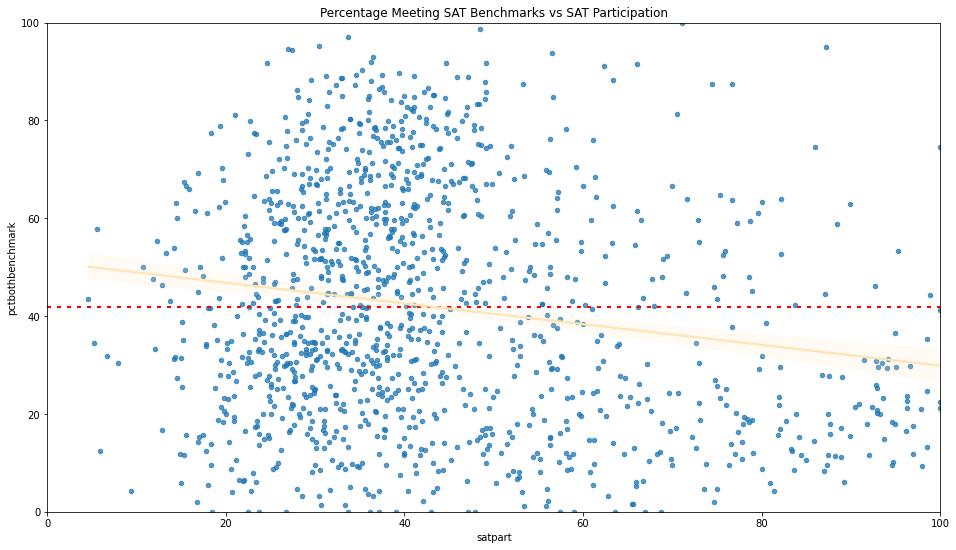

In [24]:
ax = sat.plot(
    kind='scatter', 
    x='satpart',
    y='pctbothbenchmark',
    title="Percentage Meeting SAT Benchmarks vs SAT Participation",
    xlim= (0, 100),
    ylim = (0, 100),
    alpha = .75,
    figsize=(16, 9),
)
ax.axhline(y=sat['pctbothbenchmark'].mean(), color='r', linestyle= (0, (2,3)), linewidth = 2)
ax.grid(False)

sns.regplot(sat["satpart"],sat['pctbothbenchmark'], scatter = False, color = 'moccasin')

plt.savefig('../images/satpart')
#source = Week 2, Lesson 1

## Data for AP Testing

Creating a column for all passing AP test scores:

In [25]:
ap['numpass'] = ap['NumScr3'] + ap['NumScr4'] + ap['NumScr5']
ap.drop(labels = ['NumScr3', 'NumScr4', 'NumScr5'], axis=1, inplace=True)

KeyError: 'NumScr3'

In [ ]:
Adding sat benchmarks to AP data and finding the AP test per student enrolled and the AP credits per student enrolled:

In [26]:
ap['pctbothbenchmark'] = ap.sname.map(sat.set_index('sname')['pctbothbenchmark'].to_dict())
ap['testperenroll'] = ap['numtsttakr'] / ap['enroll12']
ap['passperenroll'] = ap['numpass'] / ap['enroll12']

Graph for AP Tests:

D:\anaconda\envs\dsi-111\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


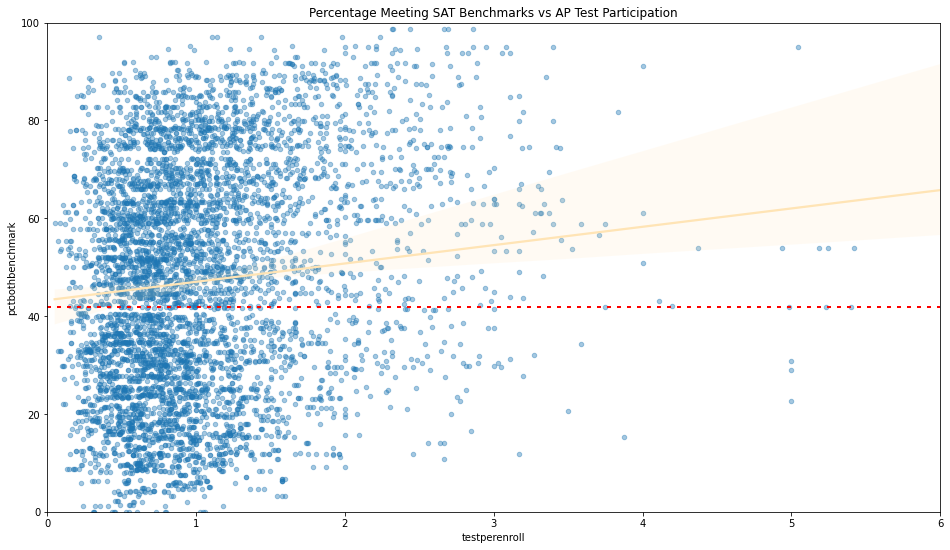

In [27]:
ax = ap.plot(
    kind='scatter',
    x='testperenroll',
    y='pctbothbenchmark',
    title="Percentage Meeting SAT Benchmarks vs AP Test Participation",
    xlim= (0, 6),
    ylim = (0, 100),
    alpha = .4,
    figsize=(16, 9)
    
)
ax.axhline(y=sat['pctbothbenchmark'].mean(), color='r', linestyle= (0, (2,3)), linewidth = 2)
ax.grid(False)

sns.regplot(ap["testperenroll"],ap['pctbothbenchmark'], scatter = False, color = 'moccasin')
plt.savefig('../images/appart')
#source = Week 2, Lesson 1

Graph for AP Credits:

D:\anaconda\envs\dsi-111\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


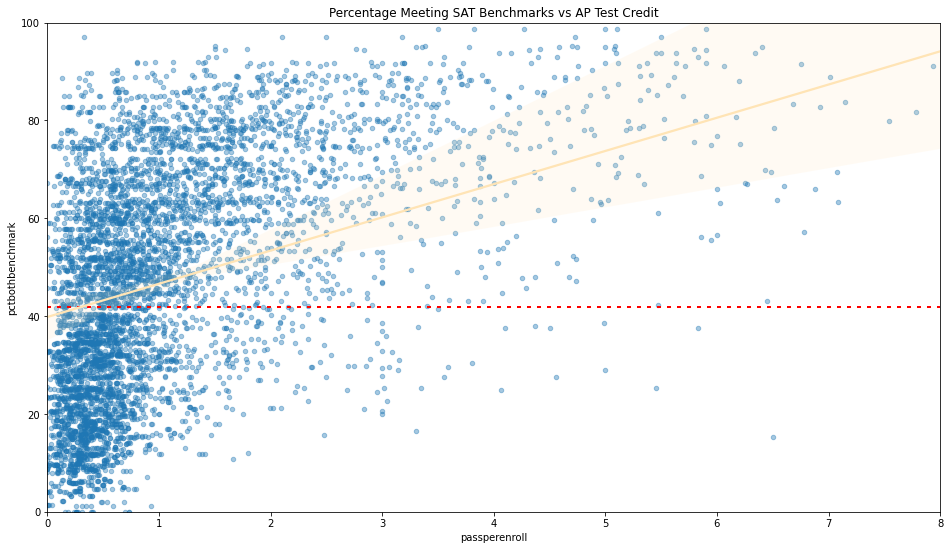

In [28]:
ax = ap.plot(
    kind='scatter', 
    x='passperenroll',
    y='pctbothbenchmark',
    title="Percentage Meeting SAT Benchmarks vs AP Test Credit",
    xlim= (0, 8),
    ylim = (0, 100),
    alpha = .4,
    figsize=(16, 9)
    
)
ax.axhline(y=sat['pctbothbenchmark'].mean(), color='r', linestyle= (0, (2,3)), linewidth = 2)
ax.grid(False)

sns.regplot(ap["passperenroll"],ap['pctbothbenchmark'], scatter = False, color = 'moccasin')
plt.savefig('../images/appass')
#source = Week 2, Lesson 1